# Sprint 03. Tasca 02
## By José Manuel Castaño

## - Exercici 2

Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mcabecera = ['movie_id', 'titulo', 'genero']
mcabecera

['movie_id', 'titulo', 'genero']

In [3]:
movies = pd.read_table('movies.dat', sep = '::', header = None, names = mcabecera, encoding = 'latin-1')
movies.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,movie_id,titulo,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.shape

(3883, 3)

In [8]:
movies.columns

Index(['movie_id', 'titulo', 'genero'], dtype='object')

In [9]:
movies.describe().round(3)

,movie_id
count,3883.000
mean,1986.049
std,1146.778
min,1.000
25%,982.500
50%,2010.000
75%,2980.500
max,3952.000


In [15]:
movies.duplicated().sum()
#No hi ha duplicats

0

In [4]:
movies['genero'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

Veiem que el titulo inclou l'any de la movie. Crearem un nou camp aillant l'any per poderlo utilitzar posteriormente en filtres i agrupacions
Observem que cada movie pot tenir diferents generos, que estan en el mateix camp. Per tant, abans de continuar l'analisi hem de separar-los en diferents camps. Una bona opció és afegir dummy variables.

In [20]:
# Afegim el camp any agafant l'any de titulo
movies['any'] = movies['titulo'].str.slice(-5,-1).astype(int)
movies

,movie_id,titulo,genero,any
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


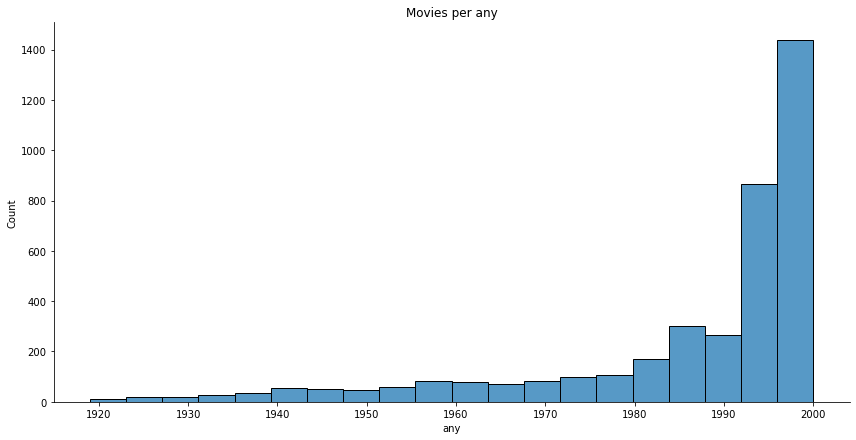

In [25]:
# Veiem histograma de l'any de la movie
sns.displot(x='any', data=movies, height=6, aspect=2, bins=20).set(title='Movies per any');

In [28]:
movies['any'].median()
#Veiem que la mediana és 1994, és a dir, la meitat de les movies es van fer entre els anys 1994 i 2000

1994.0

In [6]:
#Busquem els generos únics
total_generos =[]
for x in movies['genero']:             #Iterem tots els registres de genero, separa els generos i els afegeix a total_generos
    total_generos.extend(x.split('|'))
generos = pd.unique(total_generos)      # Buaca els valors únics de total_generos
generos

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [17]:
len(generos)

18

Creem el DF dummies amb la informació dels generos

In [7]:
matriz_ceros = np.zeros((len(movies), len(generos)))       #Matriz de ceros base de dummies
dummies = pd.DataFrame(matriz_ceros, columns = generos)    #Afegim els noms de les columnes (generos)
#Afegim els 1 segons generes
for i, gen in enumerate(movies.genero):
    indices_columnas = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices_columnas] = 1
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
dummies.sum()

Animation       105.0
Children's      251.0
Comedy         1200.0
Adventure       283.0
Fantasy          68.0
Romance         471.0
Drama          1603.0
Action          503.0
Crime           211.0
Thriller        492.0
Horror          343.0
Sci-Fi          276.0
Documentary     127.0
War             143.0
Musical         114.0
Mystery         106.0
Film-Noir        44.0
Western          68.0
dtype: float64

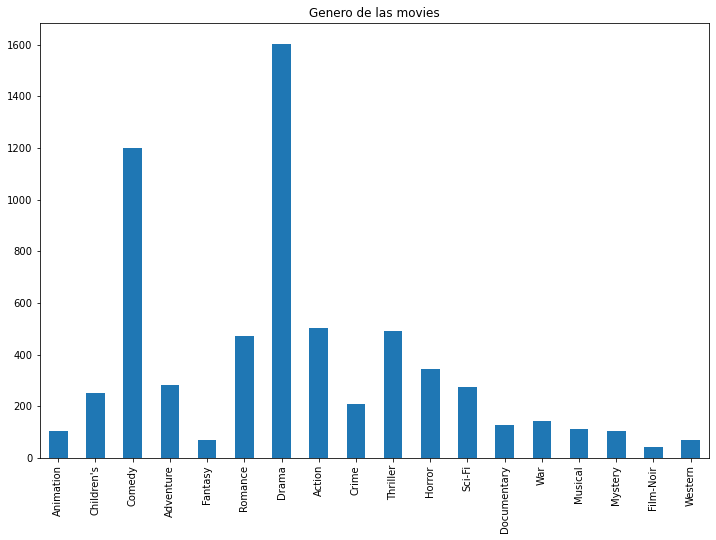

In [46]:
dummies.sum().plot(kind='bar', title='Genero de las movies', figsize=(12,8));


In [26]:
# Combinem movies amb dummies
movies_dummies = movies.join(dummies)
movies_dummies

,movie_id,titulo,genero,any,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,1995,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,3949,Requiem for a Dream (2000),Drama,2000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,3950,Tigerland (2000),Drama,2000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,3951,Two Family House (2000),Drama,2000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
